In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
import seaborn as sns

# preproces

In [11]:
# df = pd.read_csv('leaves.csv', header=None)
# df.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
# df
df = pd.read_csv('new_leaves.csv').drop(['Unnamed: 0'],axis=1)
df

,A,B,C,D,E,F,G,H,I,J,...,cnn_Kmeans_4_cluster,cluster_on_distances,2_cluster_hog_plot,PC_dectances_from_centroid_1,PC_dectances_from_centroid_2,PC_plot_hog_1,PC_pictures_hog_1,PC_pictures_hog_2,PC_cnn_features_1,PC_cnn_features_2
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,...,1,1,0,-1.140975,-3.884069,-3.874641,-0.594119,11.957644,5.891276,3.404183
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,...,0,1,0,-6.435096,0.550471,-3.054783,-5.462840,6.630552,-0.386312,15.583080
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,...,0,1,0,-7.907891,4.008734,-2.066479,-8.045611,3.459396,-4.372416,25.726816
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,...,0,1,0,-6.613881,0.746459,0.496433,-6.813601,4.748391,-6.802399,21.201992
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,...,0,1,0,-7.859157,4.059017,-4.115402,-9.762819,2.426338,-11.035375,24.993135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,...,3,0,1,11.588817,9.259357,6.976740,12.018704,2.145811,-30.436102,7.230901
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,...,3,0,1,12.977147,9.204629,6.562909,14.362893,3.853692,-30.628275,4.702037
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,...,3,0,1,5.666209,6.460358,2.763158,7.886197,1.708210,-27.708113,2.225046
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,...,3,0,1,9.511234,5.380538,4.712902,0.592375,-5.476900,-25.469162,8.524644


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   A                             340 non-null    int64  
 1   B                             340 non-null    int64  
 2   C                             340 non-null    float64
 3   D                             340 non-null    float64
 4   E                             340 non-null    float64
 5   F                             340 non-null    float64
 6   G                             340 non-null    float64
 7   H                             340 non-null    float64
 8   I                             340 non-null    float64
 9   J                             340 non-null    float64
 10  K                             340 non-null    float64
 11  L                             340 non-null    float64
 12  M                             340 non-null    float64
 13  N    

In [110]:
df['cnn_Kmeans_8_cluster'].value_counts()

cnn_Kmeans_8_cluster
2    60
5    48
4    46
6    45
3    39
1    36
0    35
7    31
Name: count, dtype: int64

<Axes: >

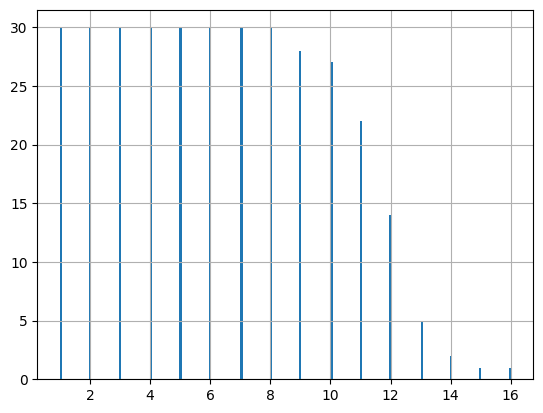

In [129]:
df['B'].hist(bins=200)

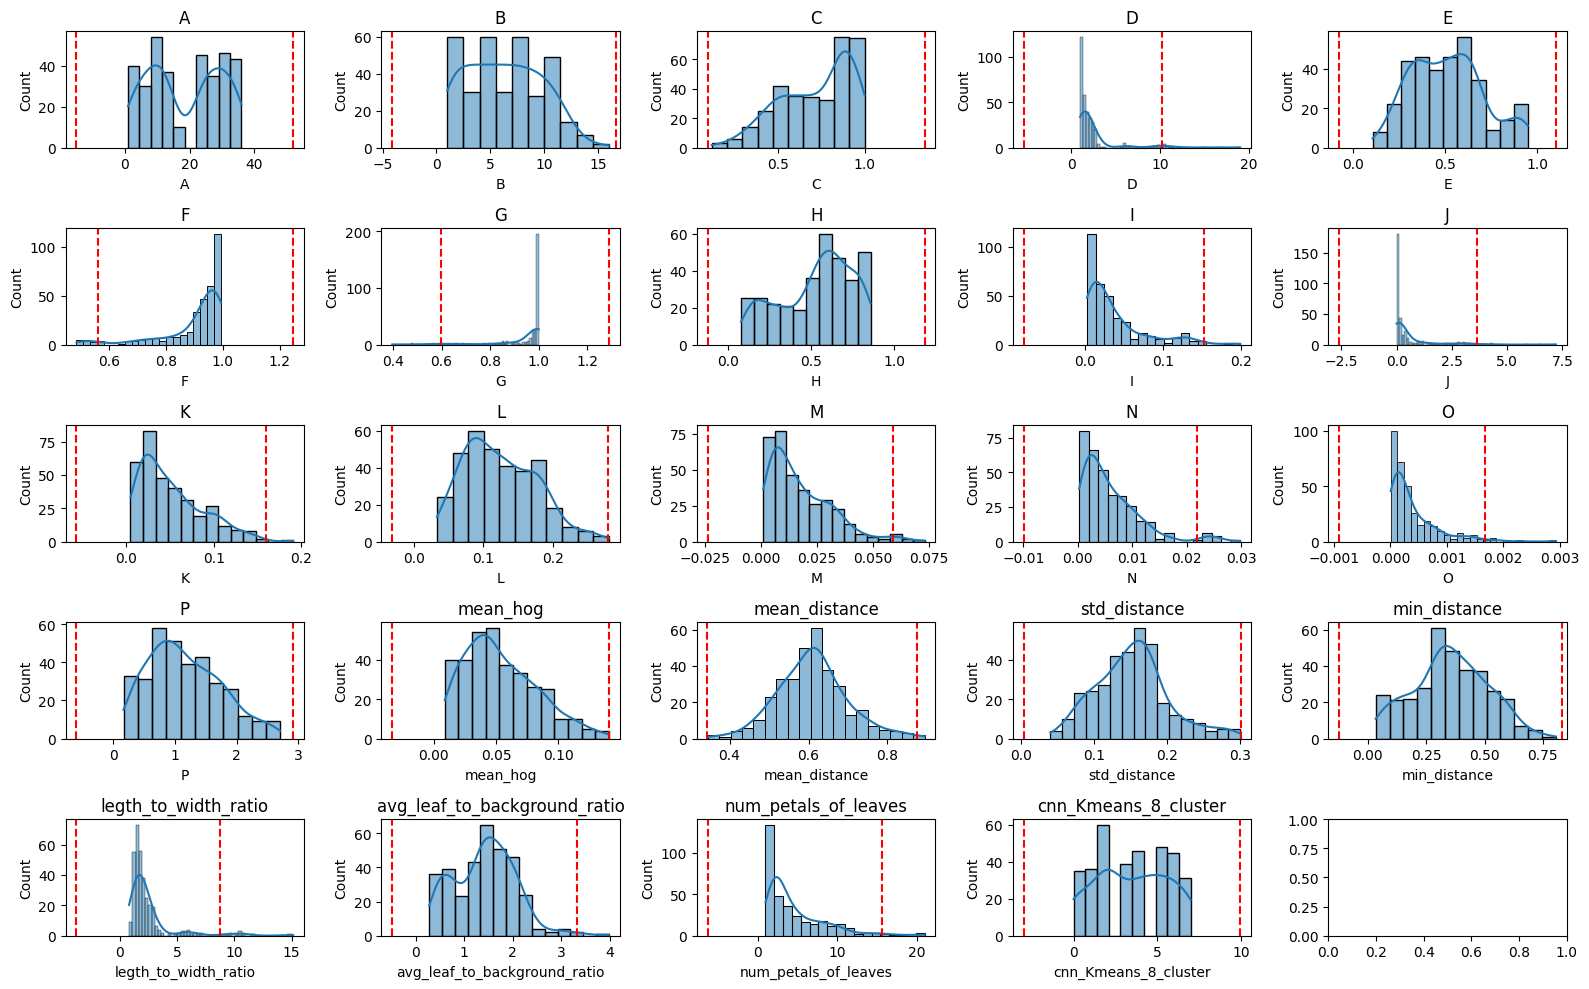

In [8]:
df_2 = df.copy()
df_2.dropna(inplace=True)
numeric_columns = df_2.select_dtypes(exclude=['object']).columns
fig, axs = plt.subplots(5, 5, figsize=(16, 10))
axs = axs.flatten()  

for i, column in enumerate(numeric_columns):
    mean = df_2[column].mean()
    std_dev = df_2[column].std()

    sns.histplot(df_2[column], kde=True, ax=axs[i])
    axs[i].set_title(column)

    axs[i].axvline(mean - 3 * std_dev, color='red', linestyle='--')
    axs[i].axvline(mean + 3 * std_dev, color='red', linestyle='--')

plt.tight_layout()

plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\akgh1\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

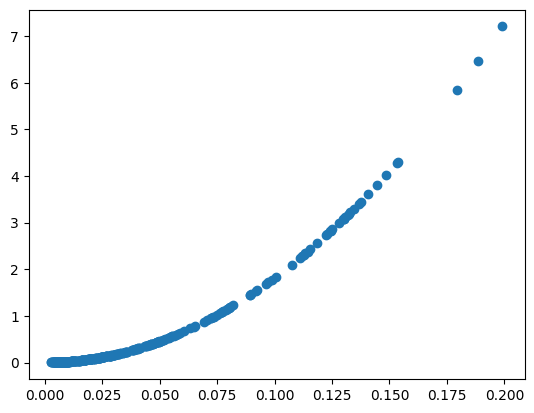

In [9]:
plt.scatter(df['I'] , df['J'])
plt

In [5]:
cluster = df['A'].value_counts()
for i in range(1 , 37):
    try:
        cluster[i]
    except:
        print(f'cluster {i} have nothing')

cluster 16 have nothing
cluster 17 have nothing
cluster 18 have nothing
cluster 19 have nothing
cluster 20 have nothing
cluster 21 have nothing


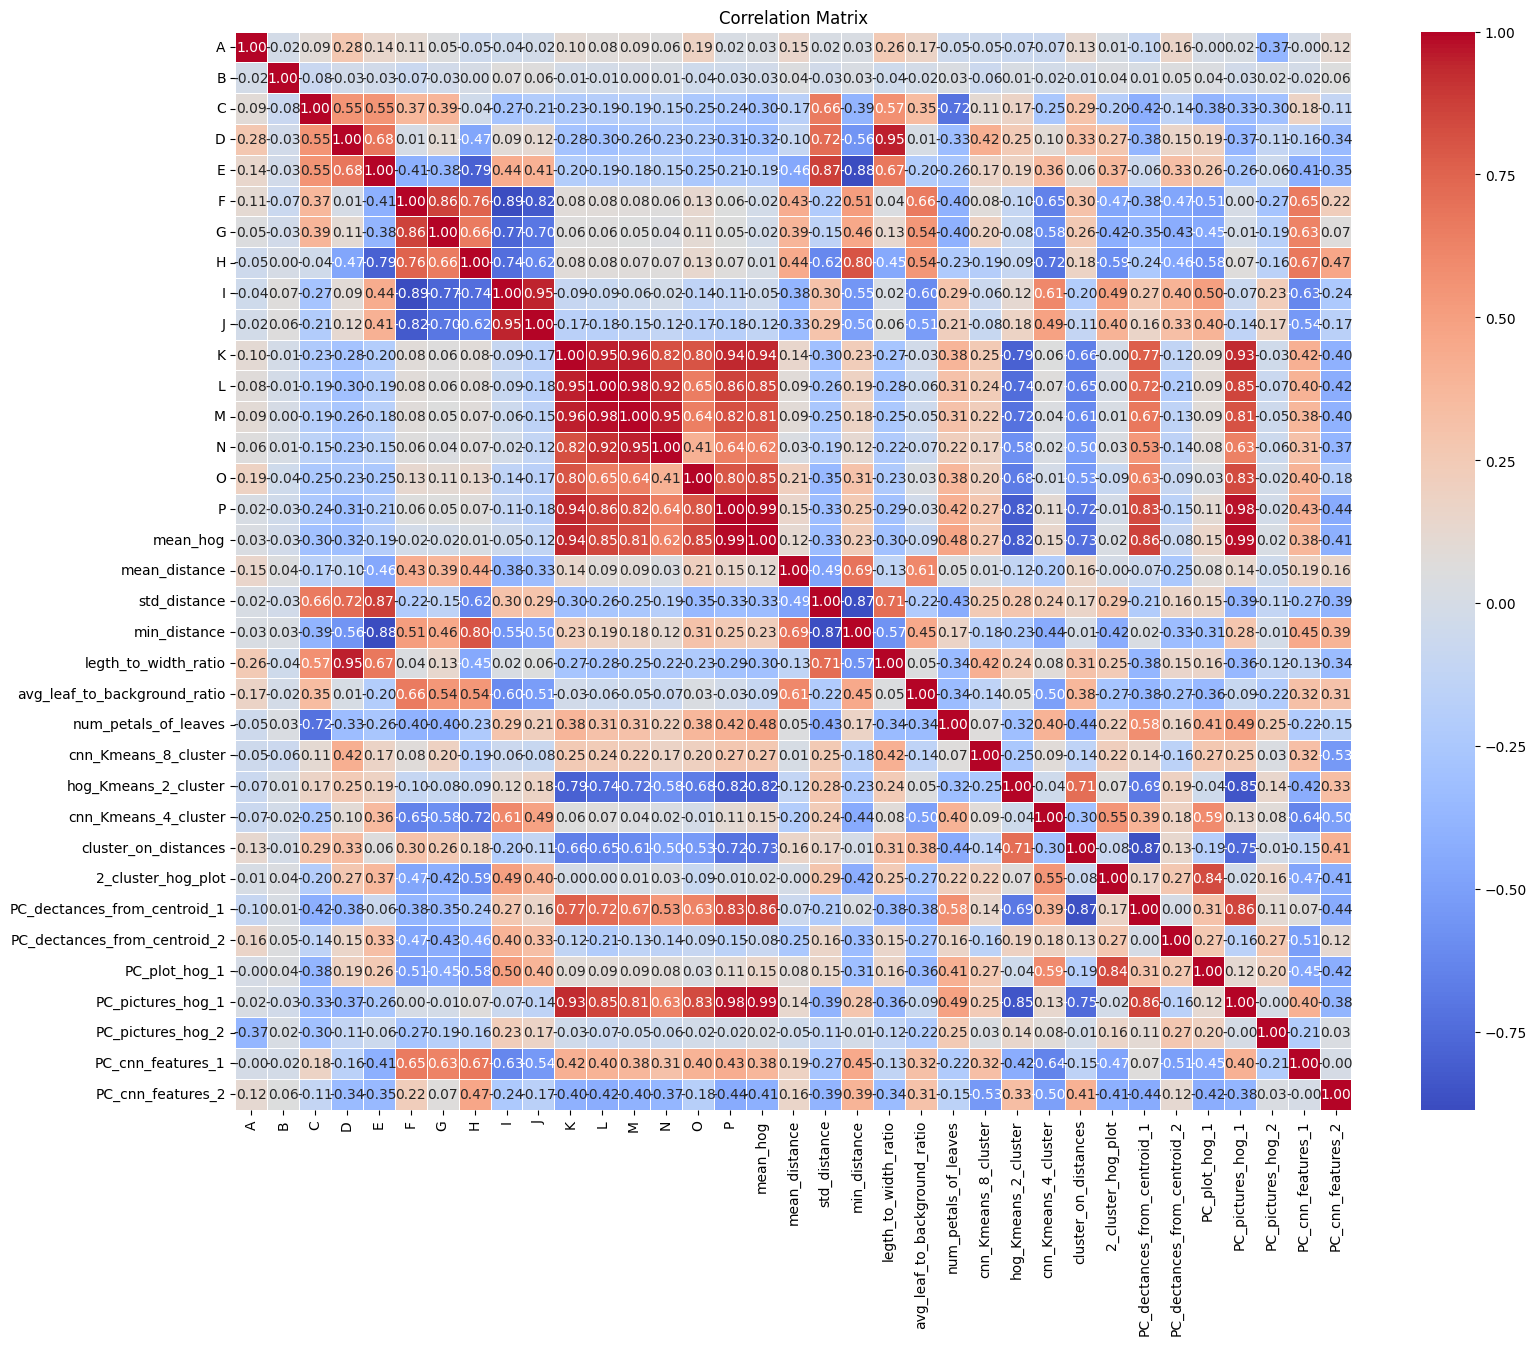

In [12]:
corr_matrix = df.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# PCA

In [4]:
from sklearn.decomposition import PCA
data = pd.read_csv('leaves.csv', header=None)
data.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']

# Select the columns with high correlation
high_corr_columns = ['K', 'L', 'M', 'N', 'O', 'P']

# Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data[high_corr_columns])

# Apply PCA
pca = PCA()  # n_components=2 Adjust n_components based on your needs
principal_components = pca.fit_transform(data[high_corr_columns])



In [7]:
principal_components.shape[1]

6

In [ ]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df

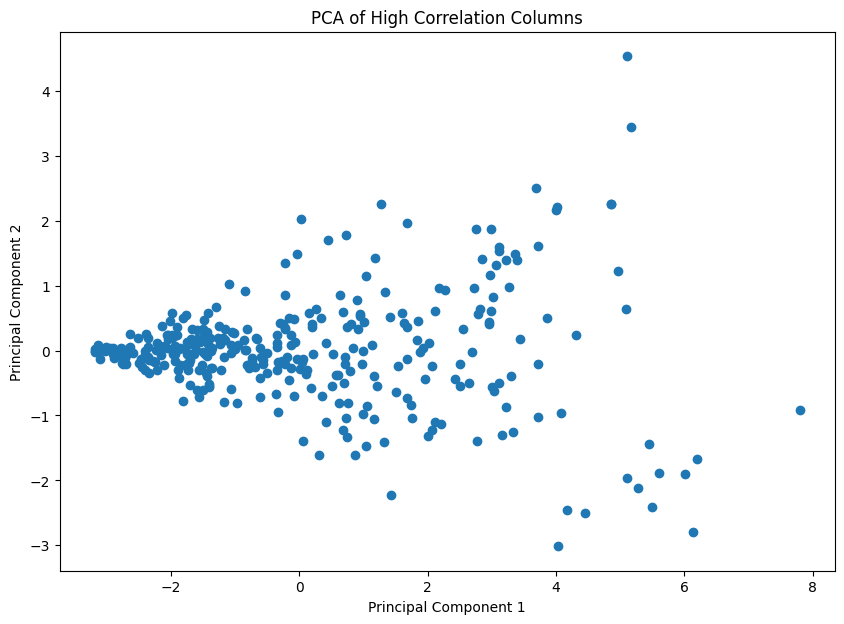

In [133]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of High Correlation Columns')
plt.show()


In [48]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it's in a CSV file)
# data = pd.read_csv('your_dataset.csv')  # Load your data

# For the sake of demonstration, I'll generate a sample dataset
data = pd.read_csv('leaves.csv', header=None)
data.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']

# Groups identified from the correlation matrix
groups = {
    'Group1': ['C', 'D', 'E'],
    'Group2': ['F', 'G', 'H'],
    'Group3': ['J' , 'I'],
    'Group4': ['K', 'L', 'M', 'N', 'O', 'P']
}

# Function to apply PCA to a group of features
def apply_pca(data, columns, n_components=2):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[columns])
    pca = PCA()#n_components=n_components
    principal_components = pca.fit_transform(scaled_data)
    pca_columns = [f'PC_{columns[0]}_{i+1}' for i in range(principal_components.shape[1])] # for i in range(n_components)
    return pd.DataFrame(data=principal_components, columns=pca_columns)

# Apply PCA to each group and combine the results
pca_results = pd.DataFrame()
for group, columns in groups.items():
    pca_df = apply_pca(data, columns, n_components=2)
    pca_results = pd.concat([pca_results, pca_df], axis=1)

# If needed, add other non-correlated features back into the dataset
non_correlated_features = ['A', 'B']  # Example of non-correlated features
final_data = pd.concat([pca_results, data[non_correlated_features]], axis=1)

# # Visualize the combined PCA results
# sns.pairplot(final_data)
# plt.show()

# Now you can use final_data for clustering or classification


In [49]:
final_data

,PC_C_1,PC_C_2,PC_C_3,PC_F_1,PC_F_2,PC_F_3,PC_J_1,PC_J_2,PC_K_1,PC_K_2,PC_K_3,PC_K_4,PC_K_5,PC_K_6,A,B
0,-0.776220,-0.546011,0.428473,-1.481307,0.716244,-0.053122,-0.954206,0.245950,-0.195094,-0.094698,-0.218798,-0.128129,0.041278,-0.001421,1,1
1,-0.612803,-0.524961,0.307707,-1.358097,0.593241,-0.031898,-0.942736,0.235917,-1.726674,-0.184291,0.008934,-0.057558,0.063217,0.003120,1,2
2,-0.447625,-0.564007,0.216538,-1.369945,0.626627,-0.077424,-0.898586,0.198741,-2.641748,-0.012940,0.212134,0.162493,0.047331,0.002240,1,3
3,-0.660162,-0.534328,0.316577,-1.382393,0.662708,-0.099239,-0.910274,0.208367,-2.353596,0.047996,0.068544,0.123938,0.024161,-0.001067,1,4
4,-0.089860,-0.651412,0.073661,-1.232379,0.430375,-0.026927,-0.899178,0.199226,-2.938984,0.004565,0.315916,0.268647,0.036689,-0.000170,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,-0.285081,1.781067,-1.468670,3.974603,0.604557,0.774646,1.690072,-0.311489,3.727304,-0.203443,-0.124264,0.074000,0.218056,-0.015530,36,6
336,-0.741478,2.027463,-1.254620,3.116795,-0.029568,0.356045,1.181459,-0.347794,4.967795,1.227036,0.247743,0.146525,0.294852,0.003789,36,7
337,-0.475675,1.782186,-1.368870,3.691197,0.465935,0.770002,1.604304,-0.320264,3.161711,-1.296815,-0.031883,0.029611,0.020655,-0.016199,36,8
338,-0.001202,0.679012,-1.089389,4.585884,1.311816,1.159053,2.632318,-0.158993,0.011976,-0.283164,-0.149630,-0.162778,0.064546,-0.003558,36,9


# TSNE

In [7]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it's in a CSV file)
data = pd.read_csv('leaves.csv', header=None)
data.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
# For the sake of demonstration, I'll generate a sample dataset
# import numpy as np
# np.random.seed(42)
# data = pd.DataFrame(np.random.rand(100, 16), columns=list('ABCDEFGHIJKLMNOP'))

# Groups identified from the correlation matrix
groups = {
    'Group1': ['C', 'D', 'E' ,'F', 'G', 'H' ,'I', 'J'],
    'Group2': ['K', 'L', 'M', 'N', 'O', 'P']
}

# Function to apply t-SNE to a group of features
def apply_tsne(data, columns, n_components=2):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[columns])
    tsne = TSNE(n_components=n_components, random_state=42)
    tsne_components = tsne.fit_transform(scaled_data)
    tsne_columns = [f'tSNE_{columns[0]}_{i+1}' for i in range(n_components)]
    return pd.DataFrame(data=tsne_components, columns=tsne_columns)

# Apply t-SNE to each group and combine the results
tsne_results = pd.DataFrame()
for group, columns in groups.items():
    tsne_df = apply_tsne(data, columns, n_components=3)
    tsne_results = pd.concat([tsne_results, tsne_df], axis=1)

# If needed, add other non-correlated features back into the dataset
non_correlated_features = ['A', 'B']  # Example of non-correlated features
final_data = pd.concat([tsne_results, data[non_correlated_features]], axis=1)

# Visualize the combined t-SNE results
# sns.pairplot(final_data)
# plt.show()

# Now you can use final_data for clustering or classification


In [8]:
final_data

,tSNE_C_1,tSNE_C_2,tSNE_C_3,tSNE_K_1,tSNE_K_2,tSNE_K_3,A,B
0,-7.208823,-2.584357,0.803727,1.067324,-1.061209,-0.509223,1,1
1,-6.697199,-1.556906,0.212036,-7.474333,0.567492,-0.345086,1,2
2,-6.550501,-0.553469,0.234816,-14.272307,0.566482,0.794192,1,3
3,-6.814232,-1.744375,0.583468,-12.039564,0.188317,1.170138,1,4
4,-5.671230,1.357697,-0.157836,-16.163679,0.987297,1.000875,1,5
...,...,...,...,...,...,...,...,...
335,7.417542,-3.334047,-1.041863,10.295980,1.225961,-1.544375,36,6
336,6.661628,-3.596373,-0.687628,11.761557,1.213727,0.241135,36,7
337,7.202648,-3.378046,-0.982035,9.213999,1.733418,-2.849296,36,8
338,8.267685,-2.662892,-1.337469,1.641300,-0.486105,-1.153537,36,9


In [21]:
# import os

# def count_jpg_files(root_directory):
#     jpg_count = 0

#     # Loop through each directory in the root directory
#     for subdir, _, files in os.walk(root_directory):
#         # Count jpg files in the current directory
#         jpg_files = [file for file in files if file.lower().endswith('.jpg')]
#         jpg_count += len(jpg_files)

#     return jpg_count

# # Example usage:
# root_directory = 'leaves'  # Replace with the path to your root directory
# total_jpg_files = count_jpg_files(root_directory)
# print(f"Total number of JPG files: {total_jpg_files}")


Total number of JPG files: 443


In [202]:
categories = final_data['A']
features = final_data[['tSNE_C_1']]#final_data.drop(['A' , 'B' ,'tSNE_C_2','tSNE_C_1'] , axis=1) # df[['K', 'L', 'M', 'N', 'O', 'P']]

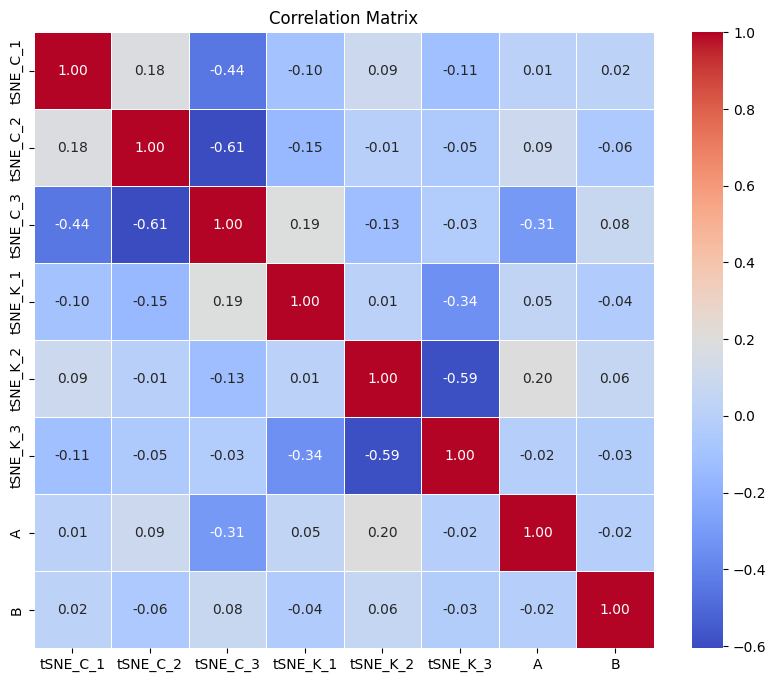

In [9]:
corr_matrix = final_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# LDA

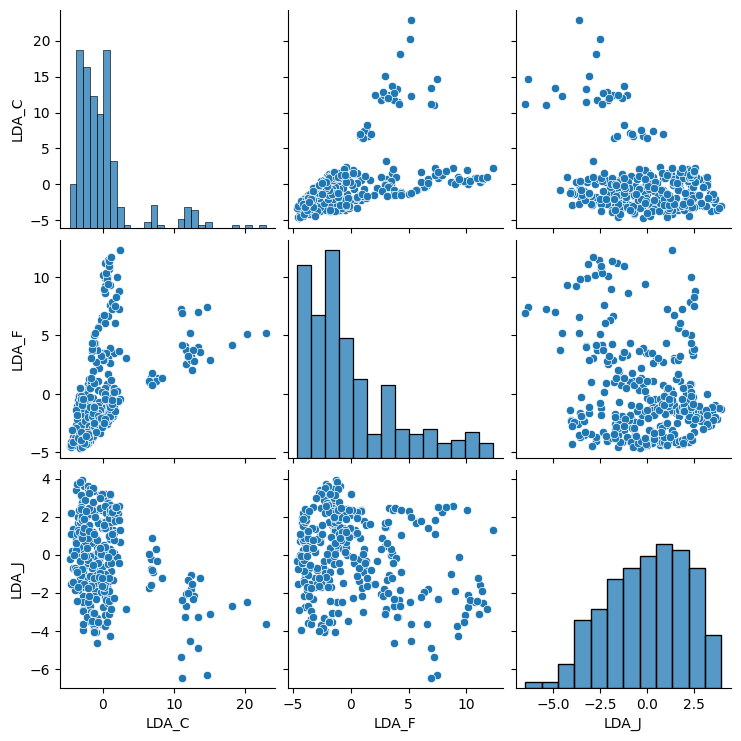

In [43]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it's in a CSV file)
# data = pd.read_csv('your_dataset.csv')  # Load your data

# For the sake of demonstration, I'll generate a sample dataset
data = pd.read_csv('leaves.csv', header=None)
data.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']

# Groups identified from the correlation matrix
groups = {
    'Group1': ['C', 'D', 'E'],
    'Group2': ['F', 'G', 'H'],
    'Group3': ['J', 'K', 'L', 'M', 'N', 'O', 'P']
}

# Function to apply LDA to a group of features
def apply_lda(data, columns, label_column):
    scaler = StandardScaler()
    X = scaler.fit_transform(data[columns])
    y = data[label_column]
    lda = LDA(n_components=1)
    lda_components = lda.fit_transform(X, y)
    lda_columns = [f'LDA_{columns[0]}']
    return pd.DataFrame(data=lda_components, columns=lda_columns)

# Apply LDA to each group and combine the results
lda_results = pd.DataFrame()
for group, columns in groups.items():
    lda_df = apply_lda(data, columns, label_column='A')
    lda_results = pd.concat([lda_results, lda_df], axis=1)

non_correlated_features = ['A', 'B']  # Example of non-correlated features
final_data = pd.concat([lda_results, data[non_correlated_features]], axis=1)

# Visualize the combined LDA results
sns.pairplot(lda_results)
plt.show()

# Now you can use lda_results for clustering or classification


In [44]:
final_data

,LDA_C,LDA_F,LDA_J,A,B
0,-3.005936,-4.373482,0.715397,1,1
1,-2.612794,-3.951799,-1.094705,1,2
2,-2.331631,-3.993756,-2.729799,1,3
3,-2.753803,-4.051472,-2.142942,1,4
4,-1.688378,-3.474561,-3.366205,1,5
...,...,...,...,...,...
335,2.256804,8.798539,2.580485,36,6
336,1.771498,7.545650,2.519606,36,7
337,1.826880,8.246143,2.524665,36,8
338,0.750573,9.383802,-0.112739,36,9


# classification

In [3]:
# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


NameError: name 'features' is not defined

In [117]:
my_list = df.columns.drop(['A'])
sublists = []

for i in range(len(my_list)):
    for j in range(i + 1, len(my_list) + 1):
        sublist = my_list[i:j]
        if len(sublist) > 3:  # Exclude sublists with length 1
            sublists.append(sublist)

print(sublists)
print(len(sublists))


[Index(['B', 'C', 'D', 'E'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
       'P'],
      dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
       'P', 'mean_hog'],
      dtype='o

In [119]:
import warnings
categories = df['A']
list_of_dics = []
warnings.filterwarnings('ignore')
# sublists = [['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'mean_hog', 'mean_distance',
#          'std_distance', 'min_distance', 'legth_to_width_ratio',
#          'avg_leaf_to_background_ratio', 'num_petals_of_leaves','hog_Kmeans_2_cluster'],
#          ['F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'mean_hog','cnn_Kmeans_8_cluster']]
for cols_list in sublists:
    dic = {}
    features = df[cols_list]
    list_r2 = []
    list_mse = []
    X_train, X_test, y_train, y_test = train_test_split(features, categories, test_size=0.2, random_state=42)
    for loop in range(10):
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        # print(classification_report(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        list_mse.append(mse)
        list_r2.append(r2)
        print(r2)
    dic['r2'] = np.array(list_r2).mean()
    dic['mse'] = np.array(list_mse).mean()
    dic['col_list'] = cols_list
    print(f'r2 = {np.array(list_r2).mean()}')
    print(f'mse = {np.array(list_mse).mean()}')
    list_of_dics.append(dic)
# 0.6153344781137196 --> wiht t-sne
# 51.69117647058823
    
# 'r2': 0.6241987476081119, --> pca
# 'mse': 50.5,
    

# {'r2': 0.6674257408215061, with nothing
# 'mse': 44.69117647058823,
# 'col_list': Index(['F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], dtype='object')}]
    


#  {'r2': 0.7176566012897287,
#   'mse': 37.94117647058823,
#   'col_list': Index(['PC_C_3', 'PC_F_1', 'PC_F_2', 'PC_F_3', 'PC_J_1', 'PC_J_2', 'PC_K_1',
#          'PC_K_2', 'PC_K_3', 'PC_K_4', 'PC_K_5', 'PC_K_6', 'B'],
#         dtype='object')},                                                                      --> pca with no n_components
#  {'r2': 0.7491740039364567,
#   'mse': 33.705882352941174,
#   'col_list': Index(['PC_C_3', 'PC_F_1', 'PC_F_2', 'PC_F_3', 'PC_J_1', 'PC_J_2', 'PC_K_1',
#          'PC_K_2', 'PC_K_3', 'PC_K_4', 'PC_K_5'],
#         dtype='object')}]


0.351376230947373
0.4179129698682431
0.3707463013240079
0.4665022989486154
0.47055140970531306
0.35356493946450696
0.4608116568040673
0.3888031465903624
0.39175790308849323
0.44669448686855373
r2 = 0.41187213436095355
mse = 79.03235294117647
0.07483290980750656
0.33364769195858857
0.15220375588818946
0.13961868191466964
0.13349029806669466
0.2525560413987781
0.2897640861900541
0.3796105708184001
0.17463801818881175
0.1561434312190304
r2 = 0.20865054854507234
mse = 106.34117647058824
0.039485267255794376
0.08238395419161848
0.11729385503990397
0.2223518638623304
0.08632362952245942
0.18470607736762767
0.2127215463869414
0.1952118782498703
0.34864034530095567
0.288013119376347
r2 = 0.17771315365538487
mse = 110.49852941176471
0.12944118730999699
0.3018019830342905
0.10766353756451486
0.04233058832806835
0.15745665632931072
0.18098527288849997
0.264375067391301
0.2459899158473764
0.32828535609161047
0.07395742640065306
r2 = 0.18322869911856224
mse = 109.75735294117646
0.4075166044118572
0

In [120]:
sorted_list = sorted(list_of_dics, key=lambda x: x['r2'])
sorted_list[-5 : ]

[{'r2': 0.6528161114696374,
  'mse': 46.65441176470588,
  'col_list': Index(['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'mean_hog', 'mean_distance',
         'std_distance', 'min_distance', 'legth_to_width_ratio',
         'avg_leaf_to_background_ratio', 'num_petals_of_leaves'],
        dtype='object')},
 {'r2': 0.6797591133155556,
  'mse': 43.03382352941176,
  'col_list': Index(['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'mean_hog', 'mean_distance',
         'std_distance', 'min_distance', 'legth_to_width_ratio',
         'avg_leaf_to_background_ratio', 'num_petals_of_leaves',
         'cnn_Kmeans_8_cluster', 'hog_Kmeans_2_cluster', 'cnn_Kmeans_4_cluster'],
        dtype='object')},
 {'r2': 0.7000484412693866,
  'mse': 40.30735294117647,
  'col_list': Index(['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'mean_hog', 'mean_distance',
         'std_distance', 'min_distance', 'legth_to_width_ratio',
         'avg_leaf_to_background_ratio', 'num_petals_of_leaves',
         'cnn_Kmeans_8_cluster'],
   

In [135]:
import warnings
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier
warnings.filterwarnings('ignore')

# final_data = pd.read_csv('leaves.csv', header=None)
# final_data.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']

categories = df['A']
features = df[['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'mean_hog', 'mean_distance',
         'std_distance', 'min_distance', 'legth_to_width_ratio',
         'avg_leaf_to_background_ratio']] #.drop('A' , axis=1)
 
models = {
    'Linear Regression degree 3': Pipeline([('poly', PolynomialFeatures(degree=1)), ('model', LinearRegression())]),
    'Ridge Regression degree 5': Pipeline([('poly', PolynomialFeatures(degree=2)), ('model', Ridge())]),
    'Random Forest degree 2': Pipeline([('poly', PolynomialFeatures(degree=2)), ('model', RandomForestRegressor(random_state=42))]),
    # 'Lasso Regression degree 6': Pipeline([('poly', PolynomialFeatures(degree=1)), ('model', Lasso())]),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor( max_depth=5),
}

mse_per_fold = []
r2_per_fold = []

for i in range(0 , 9):
    X_train, X_test, y_train, y_test = train_test_split(features, categories, test_size=0.2 ,random_state=42)
    rf1 = RandomForestClassifier()
    rf2 = RandomForestClassifier(n_estimators=200, random_state=2)
    rf3 = RandomForestClassifier(n_estimators=300, random_state=3)

    # clf = RandomForestClassifier()
    ensemble_model = VotingClassifier(estimators=[
    ('rf1', rf1), 
    ('rf2', rf2), 
    ('rf3', rf3),

    ], voting='soft')
    ensemble_model.fit(X_train, y_train)

    y_pred = ensemble_model.predict(X_test)
    y_train_pred = ensemble_model.predict(X_train)
    # y_train_pred = clf.predict(X_train)
    # print(classification_report(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mse_per_fold.append(mse)
    r2_per_fold.append(r2)
    print(r2)
    print(mse)
    print(r2_score(y_train , y_train_pred ))
    print(mean_squared_error(y_train, y_train_pred))

# X_train, X_test, y_train, y_test = train_test_split(features, categories, test_size=0.2 , random_state=42)
# model_test = {
#     'Model': [],
#     'MSE': [],
#     'R² Score': []
# }
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     if isinstance(model, Pipeline):
#         y_pred = model.named_steps['model'].predict(model.named_steps['poly'].transform(X_test))
#     else:
#         y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f'{name} Mean Squared Error: {mse}')
#     print(f'{name} R² Score: {r2}\n')

#     model_test['Model'].append(name)
#     model_test['MSE'].append(mse)
#     model_test['R² Score'].append(r2)
    
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')
avg_mse = np.mean(mse_per_fold)
avg_r2 = np.mean(r2_per_fold)
print(f"\nAverage Test MSE: {avg_mse}, Average R-squared: {avg_r2}")

0.6932525013236859
41.220588235294116
1.0
0.0
0.7709516536819389
30.779411764705884
1.0
0.0
0.7742347164576397
30.33823529411765
1.0
0.0
0.776970602104057
29.970588235294116
1.0
0.0
0.811005019545489
25.397058823529413
1.0
0.0
0.7721554433663625
30.61764705882353
1.0
0.0
0.7693101222940885
31.0
1.0
0.0
0.776970602104057
29.970588235294116
1.0
0.0
0.6698333201903534
44.36764705882353
1.0
0.0

Average Test MSE: 32.62908496732027, Average R-squared: 0.7571871090075191


In [39]:
def save_r2_and_mse(gbr , X_test, y_test  , X_train , y_train):
    mse_list = []
    r2_list = []
    mse_train = []
    r2_train = []
    for y_pred in gbr.staged_predict(X_test):
        m_s_e = mean_squared_error(y_test, y_pred)
        r_2 = r2_score(y_test, y_pred)
        mse_list.append(m_s_e)
        r2_list.append(r_2)
    for y_train_pred in gbr.staged_predict(X_train):
        r_2_train = r2_score(y_train , y_train_pred )
        m_s_e_train = mean_squared_error(y_train, y_train_pred)
        r2_train.append(r_2_train)
        mse_train.append(m_s_e_train)
        

    return r2_list , mse_list , r2_train , mse_train

gbr = GradientBoostingRegressor(n_estimators=300)

mse_per_fold = []
r2_per_fold = []
mse_list = []
r2_list = []
mse_train = []
r2_train = []
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, categories, test_size=0.2 )

    
    gbr.fit(X_train, y_train)
    
    if len(r2_per_fold) == 0:
        r2_list , mse_list , r2_train , mse_train= save_r2_and_mse(gbr , X_test , y_test , X_train , y_train)


    y_test_pred = gbr.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    mse_per_fold.append(test_mse)

    r2_fold = r2_score(y_test, y_test_pred)
    r2_per_fold.append(r2_fold)

for i, (mse, r2) in enumerate(zip(mse_per_fold, r2_per_fold), 1):
    print(f"Fold {i} Test MSE: {mse}, R-squared: {r2}")


avg_mse = np.mean(mse_per_fold)
avg_r2 = np.mean(r2_per_fold)
print(f"\nAverage Test MSE: {avg_mse}, Average R-squared: {avg_r2}")


Fold 1 Test MSE: 76.43912663337744, R-squared: 0.34386528563123764
Fold 2 Test MSE: 65.26110098795414, R-squared: 0.46913446009052795
Fold 3 Test MSE: 64.77869696279545, R-squared: 0.4684343809732294
Fold 4 Test MSE: 76.38515426255196, R-squared: 0.37756854525422
Fold 5 Test MSE: 61.53820555107856, R-squared: 0.39579264454087193
Fold 6 Test MSE: 59.48811449643446, R-squared: 0.541722131723212
Fold 7 Test MSE: 54.42571571007268, R-squared: 0.5946413117572593
Fold 8 Test MSE: 53.22273159350737, R-squared: 0.5765653524607917
Fold 9 Test MSE: 76.63663055726288, R-squared: 0.42456602309287583
Fold 10 Test MSE: 46.60613568591031, R-squared: 0.5319170999935943

Average Test MSE: 63.47816124409452, Average R-squared: 0.472420723551782



Average Test MSE: 64.01082056290892, Average R-squared: 0.46363784212225906


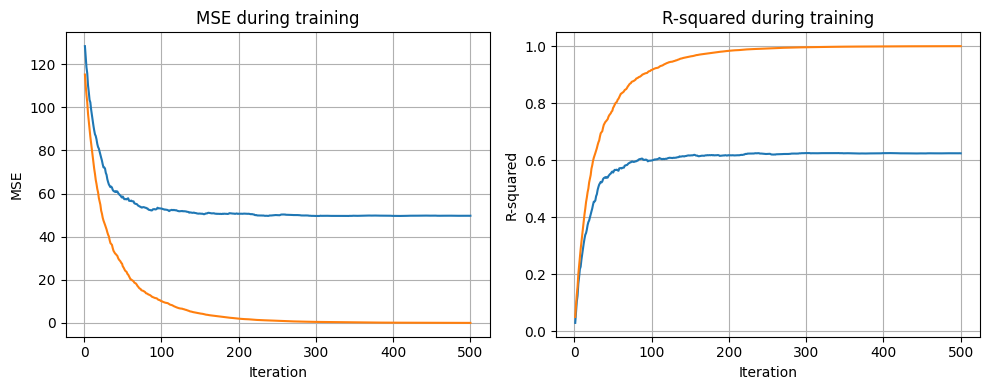

In [34]:
print(f"\nAverage Test MSE: {avg_mse}, Average R-squared: {avg_r2}")
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(mse_list) + 1), mse_list)
plt.plot(range(1, len(mse_train) + 1), mse_train)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE during training')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(r2_list) + 1), r2_list)
plt.plot(range(1, len(r2_train) + 1), r2_train)
plt.xlabel('Iteration')
plt.ylabel('R-squared')
plt.title('R-squared during training')
plt.grid(True)

plt.tight_layout()
plt.show()

# K_means

In [74]:
df = pd.read_csv('new_leaves.csv').drop('Unnamed: 0' , axis=1)
df

,A,B,C,D,E,F,G,H,I,J,...,P,mean_hog,mean_distance,std_distance,min_distance,legth_to_width_ratio,avg_leaf_to_background_ratio,num_petals_of_leaves,cnn_Kmeans_8_cluster,hog_Kmeans_2_cluster
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,...,1.17560,0.051392,0.703678,0.111736,0.542103,1.631579,2.244901,2,5,1
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,...,0.69659,0.028814,0.704189,0.107399,0.543525,1.654028,2.066886,2,0,1
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,...,0.44348,0.019050,0.636708,0.138305,0.465885,1.809816,1.882448,3,0,1
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,...,0.58785,0.024764,0.646394,0.119500,0.469862,1.634518,1.938800,2,0,1
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,...,0.34214,0.014760,0.627335,0.154731,0.407736,2.000000,1.946505,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,...,2.02810,0.105943,0.666967,0.147156,0.292140,1.010050,0.956037,11,2,0
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,...,2.40590,0.129710,0.685826,0.135519,0.296964,1.013953,1.088619,16,2,0
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,...,1.69350,0.088705,0.430635,0.128816,0.190799,1.580460,0.501203,13,2,0
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,...,1.15260,0.058292,0.591605,0.204739,0.159810,2.048969,0.406573,7,2,1


In [75]:

categories = df['A']
features = df.drop('A' , axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

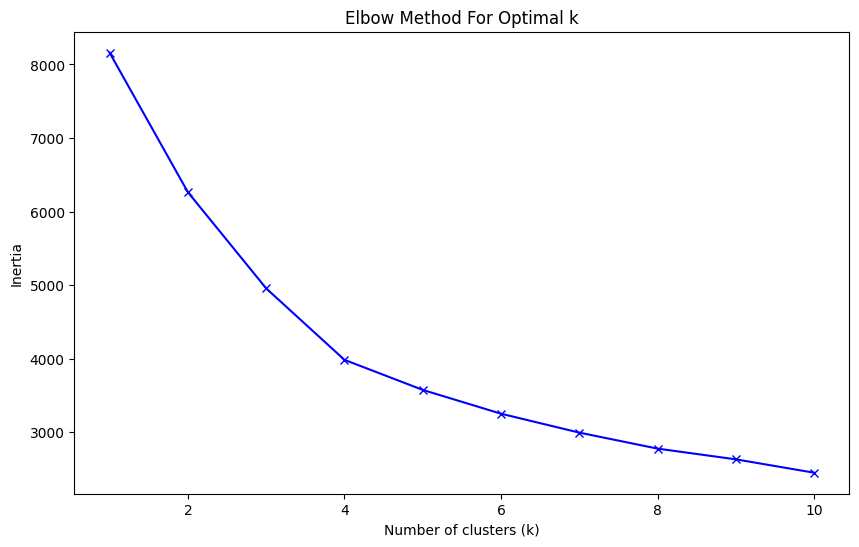

In [76]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


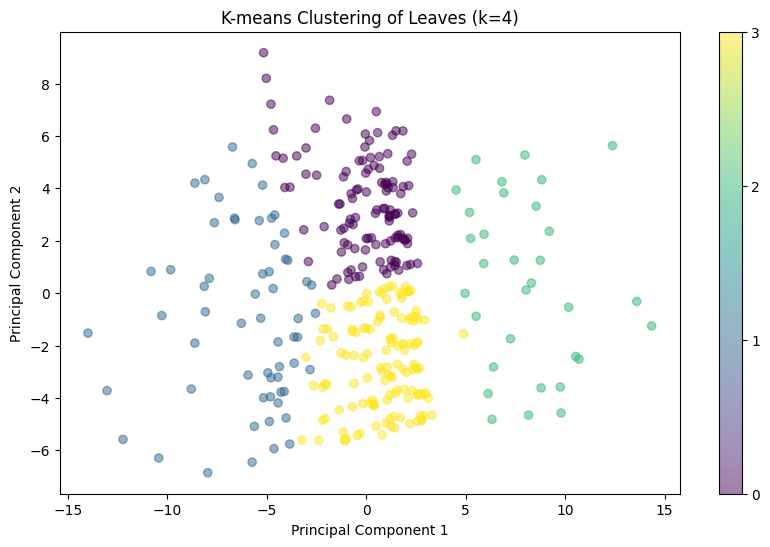

In [82]:
# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)

# Add the cluster assignments to the original data
df['Cluster'] = clusters

# Visualize the clusters using a pair plot (considering the first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Leaves (k=4)')
plt.show()


In [ ]:
from sklearn.cluster import SpectralClustering
import itertools
# Perform Spectral Clustering with 4 clusters
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42 )
clusters = spectral.fit_predict(features)

# Add the cluster assignments to the original data
df['Cluster'] = clusters

# Plot every combination of two columns
columns = features.columns
combinations = list(itertools.combinations(columns, 2))

for combo in combinations:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[combo[0]], df[combo[1]], c=df['Cluster'], cmap='viridis', alpha=0.5)
    plt.colorbar(ticks=[0, 1, 2, 3])
    plt.xlabel(combo[0])
    plt.ylabel(combo[1])
    plt.title(f'Spectral Clustering - {combo[0]} vs {combo[1]}')
    plt.show()
# # Visualize the clusters using PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(features_scaled)

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
# plt.colorbar(scatter, ticks=[0, 1, 2, 3])
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Spectral Clustering of Leaves (k=4)')
# plt.show()

In [83]:
kmeans_list = []
for i in range(2 , 50):
    dic = {}
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(features)

    # Evaluate clustering
    silhouette_avg = silhouette_score(features, clusters)
    print(f'Silhouette Score: {silhouette_avg} with i = {i}')
    dic['k'] = i
    dic['silhouette_avg'] = silhouette_avg
    kmeans_list.append(dic)

    # Analyze cluster distribution
    # df['Cluster'] = clusters
    # cluster_analysis = df.groupby('Cluster')[df.columns[0]].value_counts()
    # print(cluster_analysis)


Silhouette Score: 0.44502365895601537 with i = 2
Silhouette Score: 0.3572138561656793 with i = 3
Silhouette Score: 0.31019818465866034 with i = 4
Silhouette Score: 0.2989502367999183 with i = 5
Silhouette Score: 0.30434160512589803 with i = 6
Silhouette Score: 0.27607353786410205 with i = 7
Silhouette Score: 0.260183368580705 with i = 8
Silhouette Score: 0.2515712881141815 with i = 9
Silhouette Score: 0.24252479955349632 with i = 10
Silhouette Score: 0.24066244826851302 with i = 11
Silhouette Score: 0.24210790100620802 with i = 12
Silhouette Score: 0.23253758527065488 with i = 13
Silhouette Score: 0.24041824288731098 with i = 14
Silhouette Score: 0.23725197322141123 with i = 15
Silhouette Score: 0.23499983746131187 with i = 16
Silhouette Score: 0.24520752580179436 with i = 17
Silhouette Score: 0.2393774420847811 with i = 18
Silhouette Score: 0.25854660406311486 with i = 19
Silhouette Score: 0.2554076652605184 with i = 20
Silhouette Score: 0.24050059299097587 with i = 21
Silhouette Scor

In [87]:
sorted_list = sorted(kmeans_list, key=lambda x: x['silhouette_avg'])
sorted_list[-5 : ]

[{'k': 5, 'silhouette_avg': 0.2989502367999183},
 {'k': 6, 'silhouette_avg': 0.30434160512589803},
 {'k': 4, 'silhouette_avg': 0.31019818465866034},
 {'k': 3, 'silhouette_avg': 0.3572138561656793},
 {'k': 2, 'silhouette_avg': 0.44502365895601537}]

In [92]:
my_list = df.columns.drop(['A'])
sublists = []

for i in range(len(my_list)):
    for j in range(i + 1, len(my_list) + 1):
        sublist = my_list[i:j]
        if len(sublist) > 1:  # Exclude sublists with length 1
            sublists.append(sublist)

print(sublists)
print(len(sublists))

list_of_dics = []
for col in sublists:
    dic = {}
    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(df[col])
    df['Cluster'] = clusters
    # Evaluate clustering
    silhouette_avg = silhouette_score(df[col], clusters)
    print(f'Silhouette Score: {silhouette_avg}')
    dic['silhouette_avg'] = silhouette_avg    
    dic['col_list'] = col
    list_of_dics.append(dic)



    


    
    

# columns = features.columns
# combinations = list(itertools.combinations(columns, 2))

# for combo in combinations:
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df[combo[0]], df[combo[1]], c=df['Cluster'], cmap='viridis', alpha=0.5)
#     plt.colorbar(ticks=[0, 1, 2, 3])
#     plt.xlabel(combo[0])
#     plt.ylabel(combo[1])
#     plt.title(f'Spectral Clustering - {combo[0]} vs {combo[1]}')
#     plt.show()


[Index(['B', 'C'], dtype='object'), Index(['B', 'C', 'D'], dtype='object'), Index(['B', 'C', 'D', 'E'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'], dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
       'P'],
      dtype='object'), Index(['B', 'C', 'D', 'E', 'F', 'G', 'H',

In [93]:
sorted_list = sorted(list_of_dics, key=lambda x: x['silhouette_avg'])
sorted_list[-4 : ]

[{'silhouette_avg': 0.868861714594278,
  'col_list': Index(['D', 'E', 'F', 'G'], dtype='object')},
 {'silhouette_avg': 0.8710448222200793,
  'col_list': Index(['D', 'E', 'F'], dtype='object')},
 {'silhouette_avg': 0.8728610751555115,
  'col_list': Index(['C', 'D'], dtype='object')},
 {'silhouette_avg': 0.8735848290581891,
  'col_list': Index(['D', 'E'], dtype='object')}]

In [99]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df[['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
         'mean_hog', 'mean_distance', 'std_distance', 'min_distance',
         'legth_to_width_ratio', 'avg_leaf_to_background_ratio',
         'num_petals_of_leaves', 'cnn_Kmeans_8_cluster', 'hog_Kmeans_2_cluster',
         'Cluster']])
df['Cluster'] = clusters
# Evaluate clustering
silhouette_avg = silhouette_score(df[['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
         'mean_hog', 'mean_distance', 'std_distance', 'min_distance',
         'legth_to_width_ratio', 'avg_leaf_to_background_ratio',
         'num_petals_of_leaves', 'cnn_Kmeans_8_cluster', 'hog_Kmeans_2_cluster',
         'Cluster']], clusters) #.drop('A' , axis=1)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.39310898677331635


In [100]:
len(df[df['Cluster'] == 1])

75

In [101]:
print(f"with len {len(df[df['Cluster'] == 0])}")
df[df['Cluster'] == 0].describe().T.drop(columns=['75%' , '25%' , "50%" , "std" , 'count']).T

with len 32


,A,B,C,D,E,F,G,H,I,J,...,mean_hog,mean_distance,std_distance,min_distance,legth_to_width_ratio,avg_leaf_to_background_ratio,num_petals_of_leaves,cnn_Kmeans_8_cluster,hog_Kmeans_2_cluster,Cluster
mean,24.84375,6.0625,0.99300,9.702806,0.895429,0.88985,0.961951,0.197885,0.053285,1.034343,...,0.026459,0.601893,0.253293,0.088476,8.080263,1.420243,2.125,6.78125,1.0,0.0
min,8.00000,1.0000,0.98361,5.871900,0.828470,0.67005,0.868420,0.086183,0.007723,0.010855,...,0.008984,0.497385,0.209533,0.033337,4.197452,0.362664,1.000,0.00000,1.0,0.0
max,34.00000,11.0000,0.99871,19.038000,0.948340,0.97837,1.000000,0.321340,0.198980,7.206200,...,0.048706,0.685520,0.300577,0.159664,15.131148,2.551179,4.000,7.00000,1.0,0.0


In [102]:
print(f"with len {len(df[df['Cluster'] == 1])}")
df[df['Cluster'] == 1].describe().T.drop(columns=['75%' , '25%' , "50%" , "std" , 'count']).T

with len 75


,A,B,C,D,E,F,G,H,I,J,...,mean_hog,mean_distance,std_distance,min_distance,legth_to_width_ratio,avg_leaf_to_background_ratio,num_petals_of_leaves,cnn_Kmeans_8_cluster,hog_Kmeans_2_cluster,Cluster
mean,15.226667,6.68,0.512159,1.225508,0.512434,0.77586,0.815041,0.380051,0.073099,1.329153,...,0.065088,0.589262,0.134204,0.327277,1.445935,0.942568,8.413333,2.906667,0.52,1.0
min,4.000000,1.00,0.149860,1.011800,0.107610,0.48549,0.396490,0.078376,0.004208,0.003223,...,0.024651,0.360047,0.039974,0.068483,0.935043,0.279245,6.000000,0.000000,0.00,1.0
max,36.000000,16.00,0.936710,2.415100,0.854090,0.98529,1.000000,0.849360,0.153540,4.290400,...,0.131224,0.893907,0.209059,0.806305,2.228669,2.979631,12.000000,6.000000,1.00,1.0


In [106]:
for i in range(5):
    print(df[df['Cluster'] ==i]['A'].value_counts(),'\n')

A
31    11
34    11
8     10
Name: count, dtype: int64 

A
11    16
10     9
15     8
36     8
6      7
5      5
26     4
30     4
7      3
9      3
24     3
4      2
13     2
23     1
Name: count, dtype: int64 

A
29    12
22    12
23    10
14     9
28     9
1      9
35     8
26     7
27     6
5      6
7      5
2      4
33     4
32     2
8      1
24     1
6      1
Name: count, dtype: int64 

A
12    12
9     11
3     10
13    10
24     9
32     9
25     9
33     7
2      6
27     5
1      3
28     3
14     3
4      3
35     3
15     2
10     2
7      2
26     1
5      1
Name: count, dtype: int64 

A
30    8
4     3
10    2
36    2
13    1
Name: count, dtype: int64 



In [104]:
set(df[df['Cluster'] == 1]['A'])

{4, 5, 6, 7, 9, 10, 11, 13, 15, 23, 24, 26, 30, 36}

# DBSCAN

In [157]:

# Apply DBSCAN
j = 0.1
list_eps_minsamples = []
for k in range(1 , 50):
    eps = round(k*j, 2)
    for i in range(1 , 20):
        dic = {}
        dbscan = DBSCAN(eps=eps, min_samples=i)  # You might need to tune these parameters
        # clusters = dbscan.fit_predict(features_scaled)
        dbscan.fit(features)
        labels = dbscan.labels_

        # print(set(labels))

        df['Cluster'] = labels

        # print("\n",df.head(10) , "\n")
        # print(df.groupby('Cluster').mean().T)

        # Calculate silhouette score, ignoring noise (-1)
        try:
            silhouette_avg = silhouette_score(features[labels != -1], labels[labels != -1])
            print(f'Silhouette Score: {silhouette_avg} with i = {i}')

            dic['min_samples'] = i
            dic['eps'] = eps
            dic['silhouette_avg'] = silhouette_avg
            dic['namber of clusters'] = len(set(labels))
            list_eps_minsamples.append(dic)

        except:
            print(f'i = {i} is nois')




i = 1 is nois
i = 2 is nois
i = 3 is nois
i = 4 is nois
i = 5 is nois
i = 6 is nois
i = 7 is nois
i = 8 is nois
i = 9 is nois
i = 10 is nois
i = 11 is nois
i = 12 is nois
i = 13 is nois
i = 14 is nois
i = 15 is nois
i = 16 is nois
i = 17 is nois
i = 18 is nois
i = 19 is nois
i = 1 is nois
i = 2 is nois
i = 3 is nois
i = 4 is nois
i = 5 is nois
i = 6 is nois
i = 7 is nois
i = 8 is nois
i = 9 is nois
i = 10 is nois
i = 11 is nois
i = 12 is nois
i = 13 is nois
i = 14 is nois
i = 15 is nois
i = 16 is nois
i = 17 is nois
i = 18 is nois
i = 19 is nois
i = 1 is nois
i = 2 is nois
i = 3 is nois
i = 4 is nois
i = 5 is nois
i = 6 is nois
i = 7 is nois
i = 8 is nois
i = 9 is nois
i = 10 is nois
i = 11 is nois
i = 12 is nois
i = 13 is nois
i = 14 is nois
i = 15 is nois
i = 16 is nois
i = 17 is nois
i = 18 is nois
i = 19 is nois
i = 1 is nois
i = 2 is nois
i = 3 is nois
i = 4 is nois
i = 5 is nois
i = 6 is nois
i = 7 is nois
i = 8 is nois
i = 9 is nois
i = 10 is nois
i = 11 is nois
i = 12 is nois
i

In [158]:
sorted_list = sorted(list_eps_minsamples, key=lambda x: x['silhouette_avg'])
sorted_list[-5 : ]

#  {'min_samples': 3,
#   'eps': 0.5,
#   'silhouette_avg': 0.8016969958494558,
#   'namber of clusters': 3}]

[{'min_samples': 3,
  'eps': 2.6,
  'silhouette_avg': 0.92890996,
  'namber of clusters': 3},
 {'min_samples': 3,
  'eps': 2.7,
  'silhouette_avg': 0.92890996,
  'namber of clusters': 3},
 {'min_samples': 2,
  'eps': 2.1,
  'silhouette_avg': 0.95386523,
  'namber of clusters': 4},
 {'min_samples': 2,
  'eps': 2.2,
  'silhouette_avg': 0.95386523,
  'namber of clusters': 4},
 {'min_samples': 2,
  'eps': 2.0,
  'silhouette_avg': 0.97625107,
  'namber of clusters': 3}]

In [159]:
dbscan = DBSCAN(eps=2.0, min_samples=2) 

dbscan.fit(features)
labels = dbscan.labels_

# print(set(labels))

df['Cluster'] = labels

# print("\n",df.head(10) , "\n")
# print(df.groupby('Cluster').mean().T)


silhouette_avg = silhouette_score(features[labels != -1], labels[labels != -1])
print(f'Silhouette Score: {silhouette_avg}')





sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Silhouette Score: 0.9762510657310486


InvalidIndexError: (slice(None, None, None), 0)

In [160]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1